In [ ]:
import zipfile
import os

# Define paths
zip_file = '/content/MangoLeafBD_Dataset.zip'  # Replace with the actual name if different
unzip_path = '/content/images'

# Unzip with exception handling to catch any issues
try:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(unzip_path)
    print("Files unzipped successfully.")
except Exception as e:
    print(f"Error unzipping file: {e}")

Files unzipped successfully.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from PIL import Image

#Explorotory Data Analysis

In [ ]:
base_path = '/content/images/MangoLeafBD Dataset'
categories = os.listdir(base_path)
print("Categories:", categories)

Categories: ['Bacterial Canker', 'Powdery Mildew', 'Anthracnose', 'Healthy', 'Gall Midge', 'Sooty Mould', 'Die Back', 'Cutting Weevil']


In [ ]:
for category in categories:
    path = os.path.join(base_path, category)
    print(f"{category} has {len(os.listdir(path))} images")

Bacterial Canker has 500 images
Powdery Mildew has 500 images
Anthracnose has 500 images
Healthy has 500 images
Gall Midge has 500 images
Sooty Mould has 500 images
Die Back has 500 images
Cutting Weevil has 500 images


In [ ]:
img_path = os.path.join(base_path, categories[0], os.listdir(os.path.join(base_path, categories[0]))[0])
img = Image.open(img_path)
print("Image size:", img.size)
print("Image mode:", img.mode)

Image size: (240, 320)
Image mode: RGB


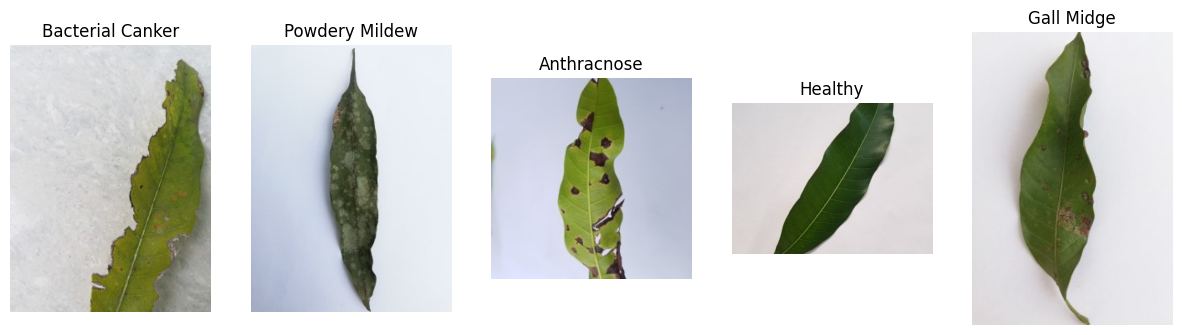

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15,5))
for i, category in enumerate(categories[:5]):
    img_path = os.path.join(base_path, category, os.listdir(os.path.join(base_path, category))[0])
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')
plt.show()

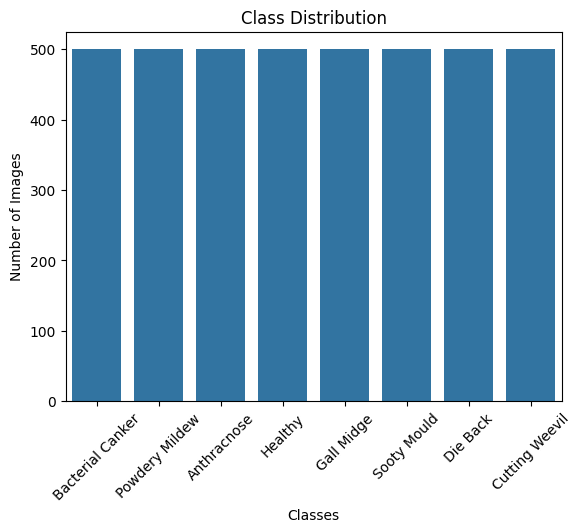

In [ ]:
class_counts = {category: len(os.listdir(os.path.join(base_path, category))) for category in categories}
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution")

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define a target size for resizing images (e.g., 128x128)
target_size = (128, 128)

# Load and preprocess images
all_images = []
labels = []  # Initialize an empty list for labels

for category in categories:
    path = os.path.join(base_path, category)
    print(f"Processing category: {category}")  # Debug print
    if os.path.isdir(path):  # Check if path is a directory
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            if img is not None:  # Check if the image is read successfully
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)  # Resize to target size
                all_images.append(img)
                labels.append(category)  # Append the corresponding label for each image
            else:
                print(f"Failed to read image: {img_path}")  # Debug print for failed reads

# Convert to a NumPy array with consistent dimensions
all_images = np.array(all_images)

# Check the lengths of both arrays
print("Number of images:", len(all_images))
print("Number of labels:", len(labels))

Processing category: Bacterial Canker
Processing category: Powdery Mildew
Processing category: Anthracnose
Processing category: Healthy
Processing category: Gall Midge
Processing category: Sooty Mould
Processing category: Die Back
Processing category: Cutting Weevil
Number of images: 4000
Number of labels: 4000


In [ ]:
# Compute and display statistics
print("Mean:", np.mean(all_images))
print("Standard Deviation:", np.std(all_images))

Mean: 173.8552796274821
Standard Deviation: 56.89975894493687


#Model Training

In [ ]:
# Convert to features and labels
X = all_images.reshape(all_images.shape[0], -1)  # Reshape to (number_of_images, 128*128*3)
y = labels

# Confirm dimensions after flattening
print("Shape after flattening:", X.shape)  # Should show (number_of_images, 49152)

# Ensure that X and y have the same length before splitting
if len(X) != len(y):
    print("Error: The number of images and labels do not match!")
else:
    # Split the dataset into training (60%), validation (20%), and test sets (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 40% for temp
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% validation and 50% test

    # Confirm the shapes of the datasets
    print("Training set shape:", X_train.shape)
    print("Validation set shape:", X_val.shape)
    print("Test set shape:", X_test.shape)

Shape after flattening: (4000, 49152)
Training set shape: (2400, 49152)
Validation set shape: (800, 49152)
Test set shape: (800, 49152)


#Random Forest Classifier

In [ ]:
# Create and train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model
print("Validation Set Evaluation:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation Set Evaluation:
[[ 83   2   1   3   7   0   0   4]
 [  4  82   0   4   6   0   0   4]
 [  2   0 105   2   0   0   0   0]
 [  2   1   0  83   0   0   0   0]
 [  5   7   0   4  74   6   1   7]
 [  4   0   0   0   5  91   4   5]
 [  2   0   0   0   3   2  73   5]
 [  0   0   0   0  10   7   5  85]]
                  precision    recall  f1-score   support

     Anthracnose       0.81      0.83      0.82       100
Bacterial Canker       0.89      0.82      0.85       100
  Cutting Weevil       0.99      0.96      0.98       109
        Die Back       0.86      0.97      0.91        86
      Gall Midge       0.70      0.71      0.71       104
         Healthy       0.86      0.83      0.85       109
  Powdery Mildew       0.88      0.86      0.87        85
     Sooty Mould       0.77      0.79      0.78       107

        accuracy                           0.84       800
       macro avg       0.85      0.85      0.85       800
    weighted avg       0.85      0.84      0.85     

#KNeighbors Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create and train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels like 'rbf'
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Evaluate the model
print("SVM Validation Set Evaluation:")
print(confusion_matrix(y_val, y_val_pred_svm))
print(classification_report(y_val, y_val_pred_svm))

# Make predictions on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate the model on the test set
print("SVM Test Set Evaluation:")
print(confusion_matrix(y_test, y_test_pred_svm))
print(classification_report(y_test, y_test_pred_svm))

SVM Validation Set Evaluation:
[[ 94   3   1   0   0   0   1   1]
 [  0  86   0   0   8   1   0   5]
 [  0   0 108   1   0   0   0   0]
 [  1   2   2  78   2   0   1   0]
 [  2   9   0   5  45   6   8  29]
 [  1   0   0   0   8  83  13   4]
 [  0   1   0   0   8   4  65   7]
 [  0   7   0   0  25   6   6  63]]
                  precision    recall  f1-score   support

     Anthracnose       0.96      0.94      0.95       100
Bacterial Canker       0.80      0.86      0.83       100
  Cutting Weevil       0.97      0.99      0.98       109
        Die Back       0.93      0.91      0.92        86
      Gall Midge       0.47      0.43      0.45       104
         Healthy       0.83      0.76      0.79       109
  Powdery Mildew       0.69      0.76      0.73        85
     Sooty Mould       0.58      0.59      0.58       107

        accuracy                           0.78       800
       macro avg       0.78      0.78      0.78       800
    weighted avg       0.78      0.78      0.78 

#Support Vector Machine Classifer

In [ ]:
# Create and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_knn = knn_model.predict(X_val)

# Evaluate the model
print("KNN Validation Set Evaluation:")
print(confusion_matrix(y_val, y_val_pred_knn))
print(classification_report(y_val, y_val_pred_knn))

# Make predictions on the test set
y_test_pred_knn = knn_model.predict(X_test)

# Evaluate the model on the test set
print("KNN Test Set Evaluation:")
print(confusion_matrix(y_test, y_test_pred_knn))
print(classification_report(y_test, y_test_pred_knn))

KNN Validation Set Evaluation:
[[65  7  0 12  8  4  2  2]
 [ 7 86  0  3  1  0  0  3]
 [ 3  1 61 44  0  0  0  0]
 [ 3  8  0 75  0  0  0  0]
 [19 16  0  3 45 10  6  5]
 [12  2  0  2 14 62 11  6]
 [ 4  2  0  0  6 16 46 11]
 [10  6  0  2  8  7 13 61]]
                  precision    recall  f1-score   support

     Anthracnose       0.53      0.65      0.58       100
Bacterial Canker       0.67      0.86      0.75       100
  Cutting Weevil       1.00      0.56      0.72       109
        Die Back       0.53      0.87      0.66        86
      Gall Midge       0.55      0.43      0.48       104
         Healthy       0.63      0.57      0.60       109
  Powdery Mildew       0.59      0.54      0.56        85
     Sooty Mould       0.69      0.57      0.63       107

        accuracy                           0.63       800
       macro avg       0.65      0.63      0.62       800
    weighted avg       0.66      0.63      0.62       800

KNN Test Set Evaluation:
[[ 69  13   0  12   4   2   